In [59]:
import cv2

In [175]:
image = cv2.imread("./dataset/images/images/frRGB00097.png")
with open("./dataset/labels/labels/frRGB00097.txt", 'r', encoding="utf-8") as file:
    label = file.readlines()
segment = cv2.imread("./dataset/segmentation/segmentation/frSEG00097.tiff", cv2.IMREAD_UNCHANGED)

In [176]:
def format_label(label, img_height, img_width):
    values = [float(x) for x in label.strip().split()]
    class_id = values[0]
    x, y, w, h = values[1:]

    x1 = (x * img_width) - (0.5 * w * img_width)
    y1 = (y * img_height) - (0.5 * h * img_height)
    x2 = (x * img_width) + (0.5 * w * img_width)
    y2 = (y * img_height) + (0.5 * h * img_height)

    return {
        "class": class_id,
        "x1": x1,
        "y1": y1,
        "x2": x2,
        "y2": y2
    }

w, h, _ = image.shape
label = [format_label(l, w, h) for l in label]
label

[{'class': 0.0,
  'x1': 1117.80096,
  'y1': 1002.30048,
  'x2': 1166.20032,
  'y2': 1083.70008},
 {'class': 0.0,
  'x1': 935.99904,
  'y1': 880.6995000000001,
  'x2': 979.99968,
  'y2': 975.29994},
 {'class': 0.0,
  'x1': 1115.0496,
  'y1': 875.1499200000001,
  'x2': 1157.9500799999998,
  'y2': 981.8496},
 {'class': 0.0,
  'x1': 1058.7504000000001,
  'y1': 858.65022,
  'x2': 1108.24992,
  'y2': 976.3497},
 {'class': 0.0,
  'x1': 874.04928,
  'y1': 833.75028,
  'x2': 916.94976,
  'y2': 927.2502},
 {'class': 0.0,
  'x1': 204.85056000000003,
  'y1': 605.8497600000001,
  'x2': 296.1504,
  'y2': 741.1500000000001},
 {'class': 0.0,
  'x1': 24.250559999999993,
  'y1': 605.8497600000001,
  'x2': 128.7504,
  'y2': 741.1500000000001},
 {'class': 0.0,
  'x1': 1792.7500799999998,
  'y1': 436.2498,
  'x2': 1886.2502399999998,
  'y2': 474.74963999999994},
 {'class': 0.0,
  'x1': 1615.9507199999998,
  'y1': 435.04992,
  'x2': 1705.05024,
  'y2': 477.94968},
 {'class': 0.0,
  'x1': 1763.2992000000002,

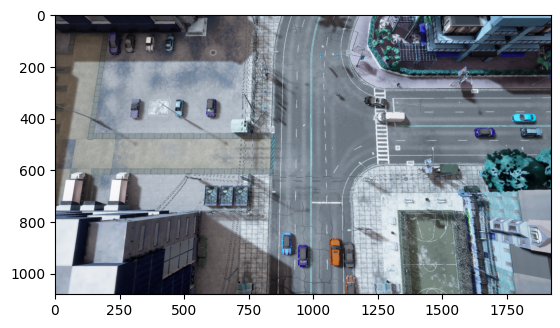

In [177]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

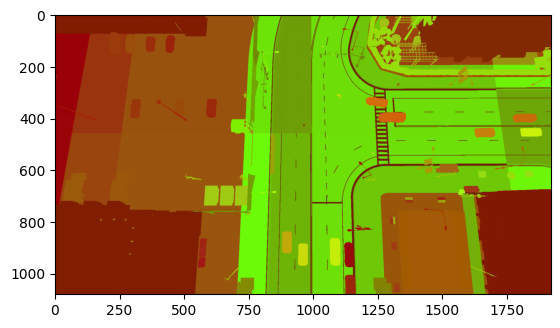

In [178]:
plt.imshow(segment)
plt.show()

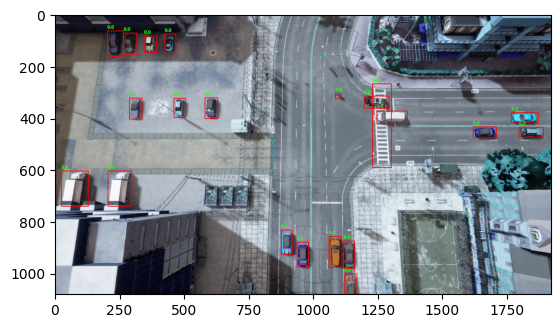

In [179]:
for rect in label:
    cv2.rectangle(image, (int(rect['x1']), int(rect['y1'])), (int(rect['x2']), int(rect['y2'])), (255, 0, 0), 2)
    label_text = str(rect['class'])
    label_x = int(rect['x1'])
    label_y = int(rect['y1']) - 10
    cv2.putText(image, label_text, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36, 255, 12), 2)

plt.imshow(image)
plt.show()